In [47]:
from datetime import datetime
import re
from collections import Counter
from  itertools import chain

In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.colors import ListedColormap

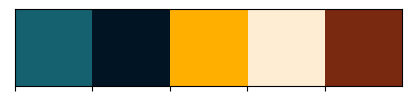

In [49]:
pclabcol = ['#15616F','#001424','#FFAF00', '#FEEDD3', '#792910']
#minus the yellow
pclabcol2 = ['#001424','#15616F', '#FEEDD3', '#792910']
pclabcol3 = ['#15616F', '#AB796A','#FFAF00', '#FEEDD3', '#792910','#C5D7DB','#0B3137', '#FFEBBF','#9F6D00','#3C1508']
#minus the creme
pclabcol4 = ['#FFAF00','#15616F', '#001424','#792910']
sns.palplot(sns.color_palette(pclabcol))
my_colors = ListedColormap(sns.color_palette(pclabcol))
my_colors2 = ListedColormap(sns.color_palette(pclabcol2))
my_colors3 = ListedColormap(sns.color_palette(pclabcol3))

In [50]:
# Plot Specifics
TITLESIZE = 60
AXESLABEL = 40
AXESTICKS = 35
LINWID = 10
DOTS = 20
LEGSIZE = 25

In [51]:
#filename = "Copy of Literature Review (Responses) - 10-12"
filename =  "Copy of Literature Review (Responses) - Copy of Form Responses 1.csv"

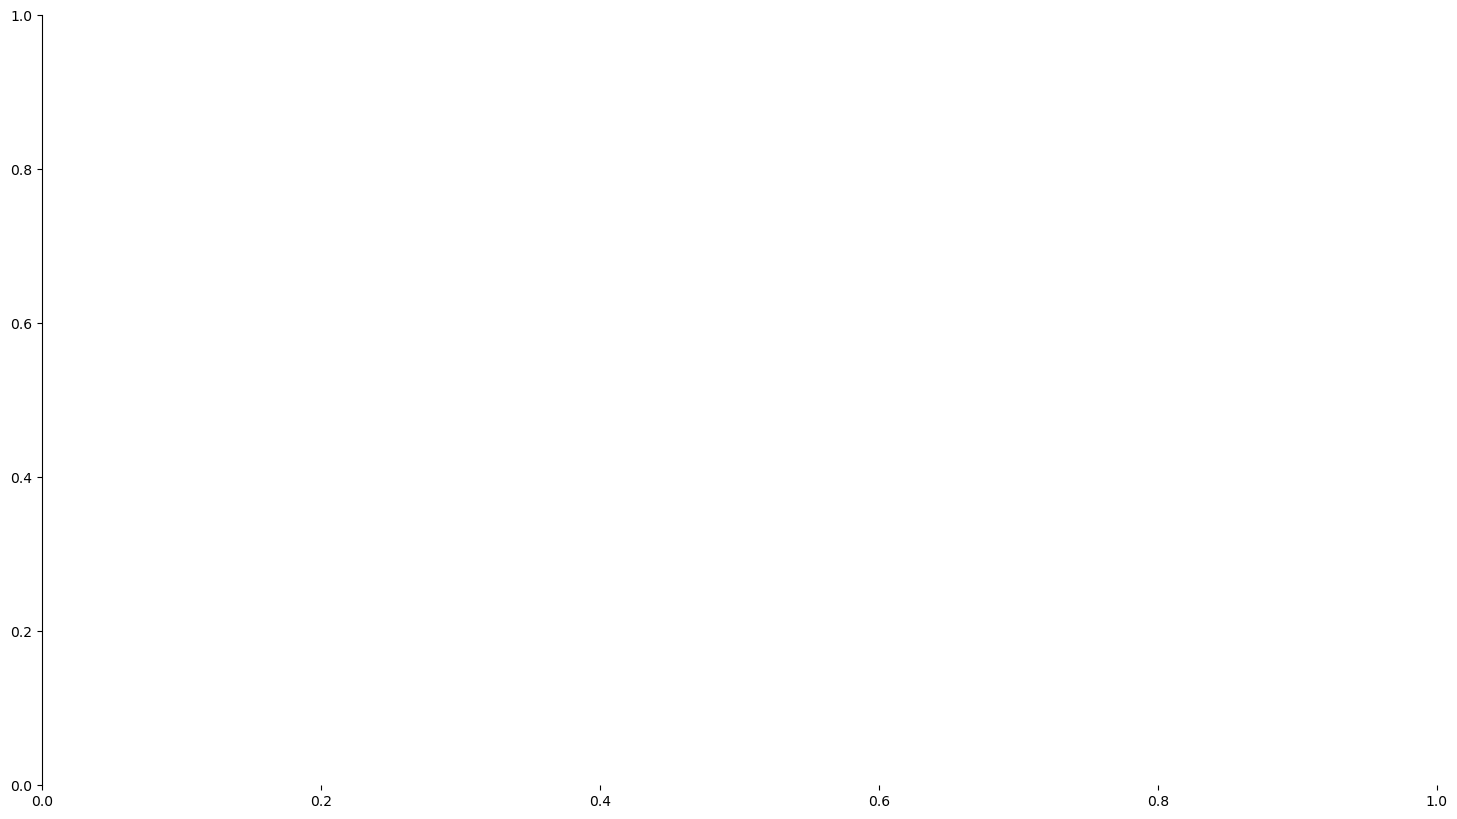

In [52]:
plt.rcParams["figure.figsize"] = (18,10)
for pos in ['right', 'top', 'bottom']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)


# ITI Percentages Graph

In [7]:
#survey_df['Intertrial Interval (ITI) (time between trials)'].value_counts(dropna=False)

In [8]:
survey_df = pd.read_csv(filename, keep_default_na=False)

In [9]:
survey_df["Rats used"] = survey_df["Species"].apply(lambda x: "1" if x == "Rats" or x == "Both" else "0")
survey_df["Mice used"] = survey_df["Species"].apply(lambda x: "1" if x == "Mice" or x == "Both" else "0")

In [10]:
comma_df = survey_df['Intertrial Interval (ITI) (time between trials)'].str.contains(',')
#no_comma_df = survey_df['Intertrial Interval (ITI) (time between trials)'].str.contains(',')==False
rat_df = survey_df["Rats used"]
mice_df = survey_df["Mice used"]

In [11]:
#Finding number of mice trials
m_trials = 0
for i in range(len(mice_df)):
    if mice_df[i] =='1':
        m_trials = m_trials + 1
r_trials = 650-m_trials

In [12]:
#Finding percentage of trials that corresponded to each bin 
m_1 = 0
r_1 = 0
m_2 = 0  
r_2 = 0 
for i in range(len(comma_df)):
    if comma_df[i] == False and mice_df[i] == '1': #Mouse and no comma
        m_1 = m_1 +1
    elif comma_df[i] == False and mice_df[i] == '0': #Rat and no comma
        r_1 = r_1 +1
    elif comma_df[i] == True and mice_df[i] == '1': #Mouse comma
        m_2 = m_2 +1
    elif comma_df[i] == True and mice_df[i] == '0': #Rat comma
        r_2 = r_2 +1
        
#Getting percentage
mice_overall = []
mice_overall.append(m_1)
mice_overall.append(m_2)
mice_overall_P = [x / m_trials for x in mice_overall]

rats_overall = []
rats_overall.append(r_1)
rats_overall.append(r_2)
rats_overall_P = [x / r_trials for x in rats_overall]

Text(0, 0.5, 'Percentage')

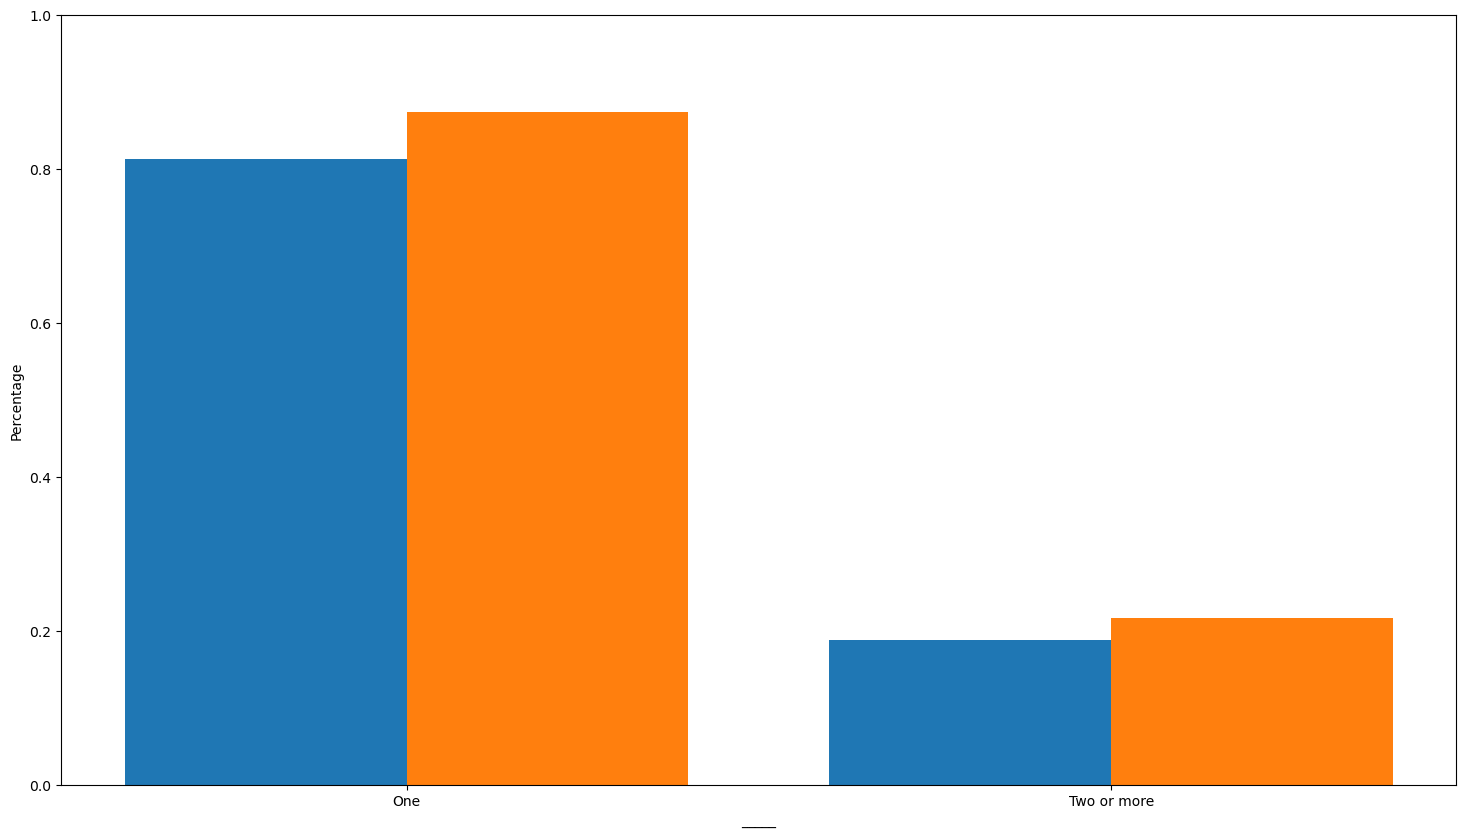

In [13]:
#Graphing percentages
x = ['One', 'Two or more']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, mice_overall_P, 0.4, label = 'mice')
plt.bar(x_axis + 0.2, rats_overall_P, 0.4, label = 'rats')
plt.xticks(x_axis, x)
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.xlabel("_____")
plt.ylabel('Percentage')


# Subject vs Social Agent Bar graph

Percent of papers the specify social agent vs subject

   Age

   Housing history

   Strain

   Social rank

   Sex

In [14]:
#Create two lists, one for subject one for social agent
#Within each column find number of nonspecifed and percentage them. Put them
# in correct list 
#Make bar graph 

In [15]:
subject_data = []
agent_data = []

In [16]:
#Subject Data
subject_age_P = sum(survey_df['Subject Age'].str.contains('Does not specify')) / len(survey_df['Subject Age'])
subject_data.append(subject_age_P)
subject_strain_P = sum(survey_df['Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black'].str.contains('Does not specify')) / len(survey_df['Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black'])
subject_data.append(subject_strain_P)

subject_sex_P = sum(survey_df['Subject Sex'].str.contains('Does not specify')) / len(survey_df['Subject Sex'])
subject_data.append(subject_sex_P)
subject_housing_P = sum(survey_df['Subject Housing'].str.contains('Does not specify')) / len(survey_df['Subject Housing'])
subject_data.append(subject_housing_P)

In [17]:
#Social Agent Data
agent_age_P = sum(survey_df['Social Agent Age (check all that apply)'].str.contains('Does not specify')) / len(survey_df['Social Agent Age (check all that apply)'])
agent_data.append(agent_age_P)
agent_strain_P = sum(survey_df['Social Agent Strain '].str.contains('pec' or 'n/a')) / len(survey_df['Social Agent Strain '])
agent_data.append(agent_strain_P)

agent_sex_P = sum(survey_df['Social Agent Sex'].str.contains('Does not specify')) / len(survey_df['Social Agent Sex'])
agent_data.append(agent_sex_P)
agent_housing_P = sum(survey_df['Social Agent Housing'].str.contains('Does not specify')) / len(survey_df['Social Agent Housing'])
agent_data.append(agent_housing_P)


In [18]:
print('subject_age_P: ' + str(subject_age_P))
print('subject_strain_P: ' + str(subject_strain_P))
print('subject_sex_P: '+str(subject_sex_P))
print('subject_housing_P: ' + str(subject_housing_P))

print('agent_age_P: ' + str(agent_age_P))
print('agent_strain_P: ' + str(agent_strain_P))
print('agent_sex_P: ' + str(agent_sex_P))
print('agent_housing_P: ' + str(agent_housing_P))

subject_age_P: 0.06398809523809523
subject_strain_P: 0.025297619047619048
subject_sex_P: 0.03869047619047619
subject_housing_P: 0.18303571428571427
agent_age_P: 0.19047619047619047
agent_strain_P: 0.34077380952380953
agent_sex_P: 0.1875
agent_housing_P: 0.59375


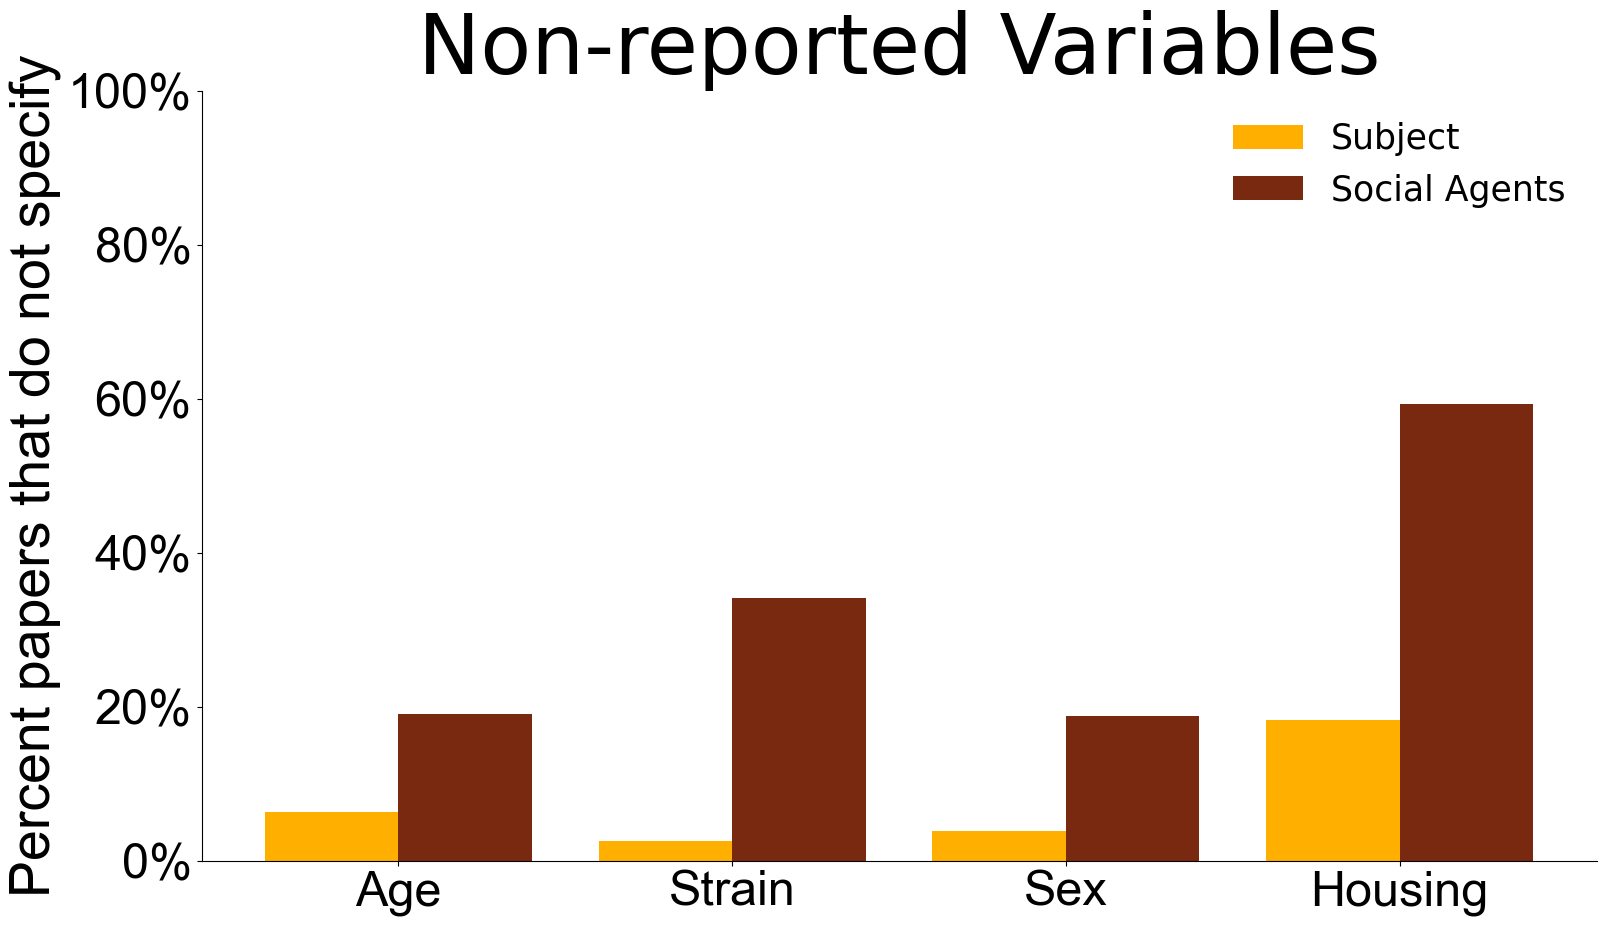

In [19]:
plt.rcParams["figure.figsize"] = (18,10)

x = ['Age','Strain','Sex','Housing']
x_axis = np.arange(len(x))


for pos in ['right', 'top']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)

plt.bar(x_axis - 0.2, subject_data, 0.4, label = 'Subject', color = pclabcol[2])
plt.bar(x_axis + 0.2, agent_data, 0.4, label = 'Social Agents', color = pclabcol[4])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0)) #Makes y percentages

plt.xticks(x_axis, x, fontsize = AXESTICKS, family="Arial") # x tick spacing and size
plt.yticks(np.arange(0, 1.2, step=0.2), fontsize = AXESTICKS, family="Arial")

#Visuals
#plt.xlabel(, family="Arial", fontsize = 15)
plt.ylabel('Percent papers that do not specify', fontsize = AXESLABEL, family="Arial")
plt.title("Non-reported Variables", fontsize = TITLESIZE)
plt.legend(frameon = False, fontsize = LEGSIZE) # legend, removes graph border
#plt.savefig("./proc/plots/non_reported_variables.svg")

## Box and Whisker Graph for Degree of Familiarity

In [20]:
#for i in dfam_lst:
#for i in range(1000):
#    dfam_lst.remove('Does not specify')
#dfam_lst = [x for x in dfam_lst if x != 'Does not specify']

dfam_lst = survey_df['Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) '].tolist()
#[i if i!='5 min exposure or less' else '5' for i in dfam_lst]
#[x.replace('littermate', '') for x in dfam_lst
 
#for i in range(len(dfam_lst)): # Converts '5min..' to a the number 5
#    dfam_lst[i] = 5 if dfam_lst[i] == '5 min exposure or less' else dfam_lst[i]
#    if ', littermate' in dfam_lst[i]:
#        dfam_lst[i].replace(', littermate','')
        
list(filter(lambda a: a != 'Does not specify', dfam_lst)) #Removes all does not specify



['5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less, 9 minutes',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '10 minutes',
 '10 minutes',
 '10 minutes',
 '5 min exposure or less',
 '20 minutes',
 '5 min exposure or less',
 '10 minutes',
 '8 minutes',
 '5 min exposure or less',
 '10 minutes',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '10 minutes',
 '10 minutes',
 '10 minutes',
 '5 min exposure or less',
 '10 minutes',
 'cagemate, 15 minutes, 20 minutes',
 '60 minutes',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '10 minutes',
 '5 min exposure or less',
 '10 minutes',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '10 minutes',

In [21]:
# turn column into series
column_name = 'Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) '
dfam_df = pd.read_csv(filename,usecols = [column_name])
dfam_df = dfam_df[dfam_df[column_name].str.contains('minutes')==True]

In [22]:
fixed_column_name = column_name + "_fixed"
copy_dfam_df = dfam_df.copy()
copy_dfam_df[fixed_column_name] = copy_dfam_df[column_name].apply(lambda x: x.split(","))
exploded_dfam_df = copy_dfam_df.explode(fixed_column_name).reset_index()

exploded_dfam_df = exploded_dfam_df[exploded_dfam_df[fixed_column_name].str.contains('minutes')==True]

In [23]:
exploded_dfam_df = exploded_dfam_df.drop(column_name,axis = 1)

In [24]:
exploded_dfam_s = exploded_dfam_df[fixed_column_name].str.replace(r'\D','').astype(int)

C:\Users\megha\AppData\Local\Temp\ipykernel_31172\3369587313.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  exploded_dfam_s = exploded_dfam_df[fixed_column_name].str.replace(r'\D','').astype(int)


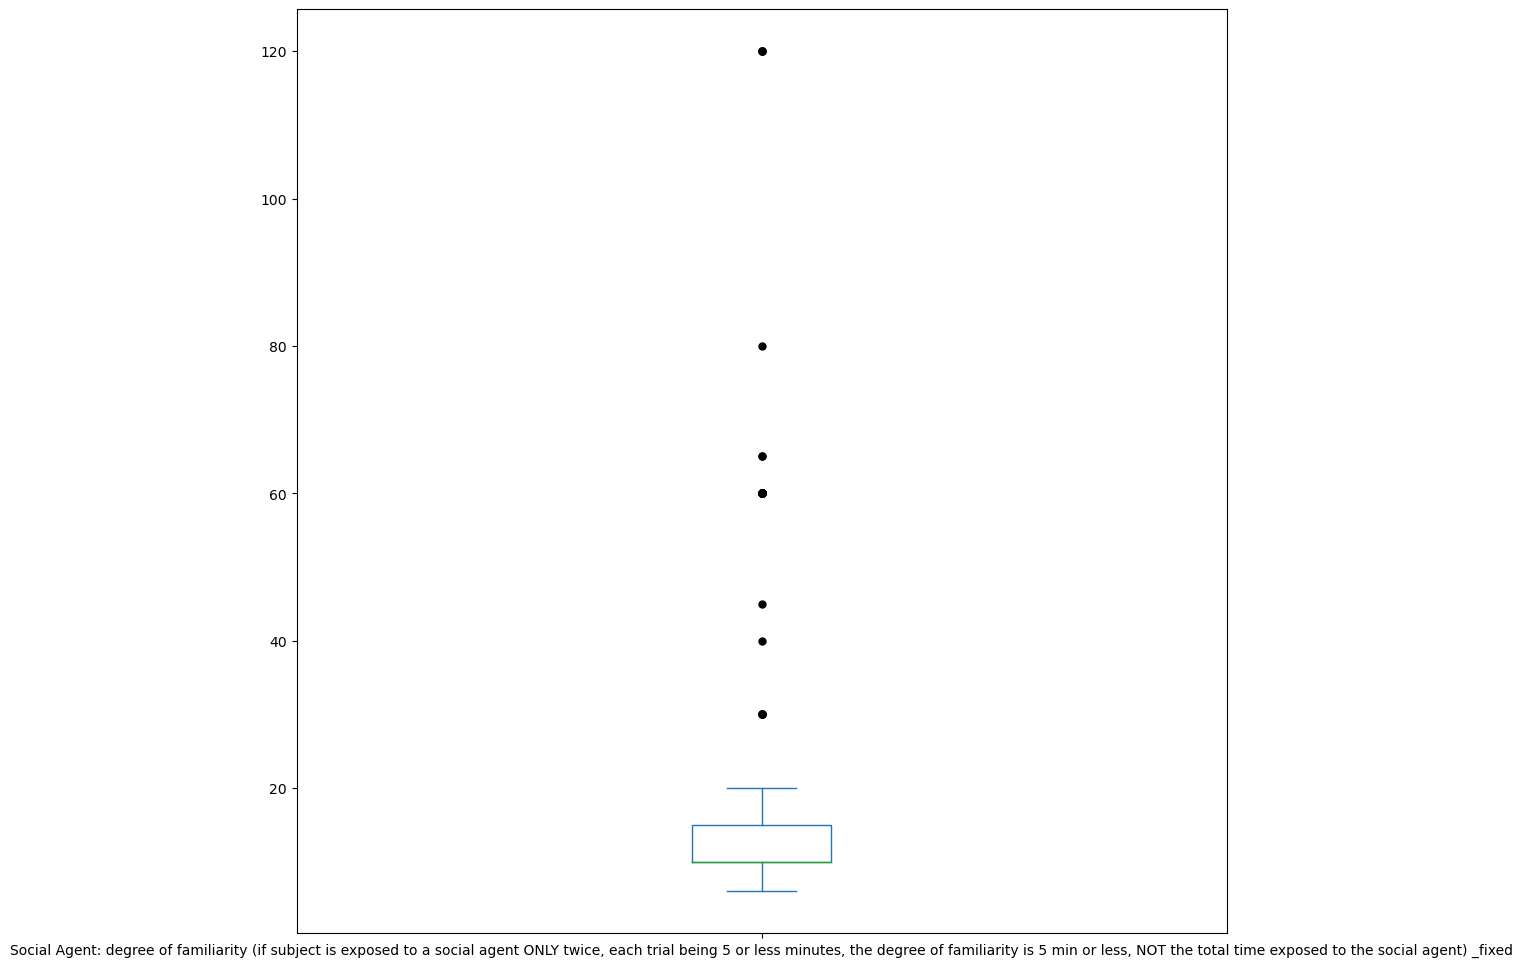

In [25]:
plt.rcParams["figure.figsize"] = (12,12)
ax = exploded_dfam_s.plot.box(flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'black'})

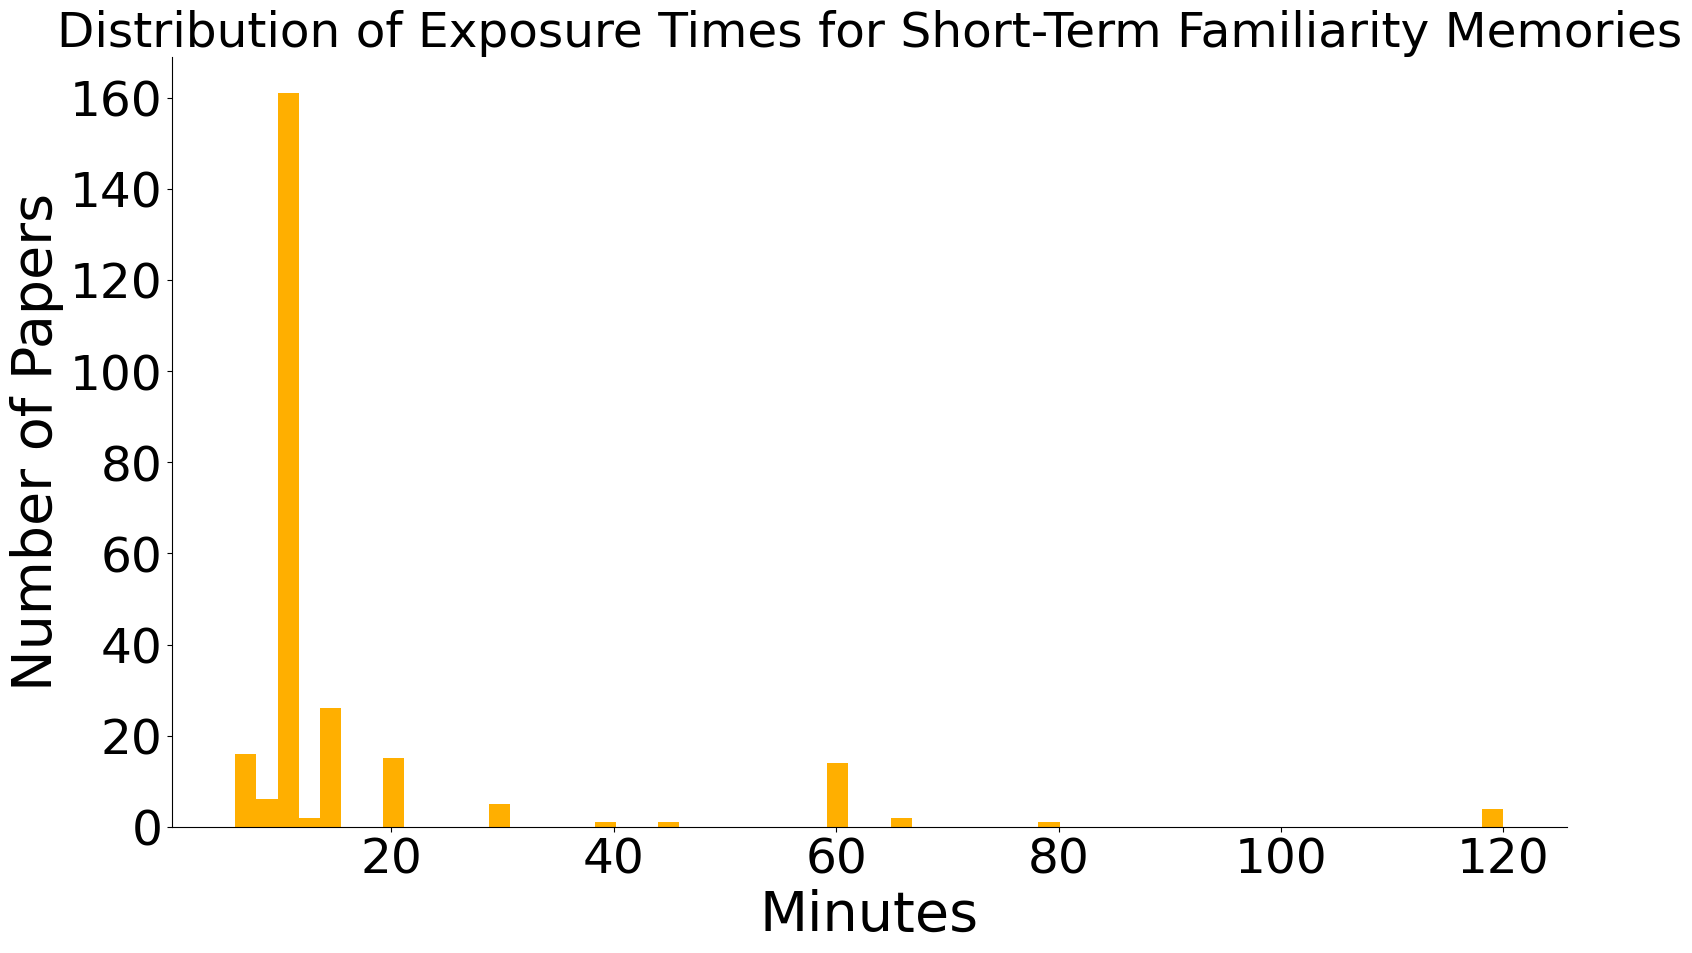

In [26]:
plt.rcParams["figure.figsize"] = (18,10)
ax1 = exploded_dfam_s.hist(bins = 60, color = pclabcol[2])
plt.title('Distribution of Exposure Times for Short-Term Familiarity Memories', fontsize = 35)
plt.xticks(fontsize=AXESTICKS)
plt.yticks(fontsize=AXESTICKS)
plt.xlabel('Minutes', fontsize = AXESLABEL)
plt.ylabel('Number of Papers', fontsize = AXESLABEL)
# Removes graph border
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False)
# gets rid of grid lines
plt.grid(False)
#plt.savefig("./proc/plots/famtime_stm.svg")

# Rank w/ only G-housed and Adult

SUBJECT: group-housed + adult( + old)

SOCIAL AGENT: group-housed + adult(+old)

calculate percent rank does not specify

In [53]:
rank_df = pd.read_csv(filename)

In [54]:
#Filters for Subject (group-housed and adult/old only)
s_grank_df = rank_df.loc[rank_df['Subject Housing'].str.contains('group-housed')]
s_gArank_df = s_grank_df.loc[s_grank_df['Subject Age'].str.contains('adult' or 'old')]

#Filters for Social agent (group-housed and adult/old only)
sa_grank_df = rank_df.loc[rank_df['Social Agent Housing'].str.contains('group-housed')]
sa_gArank_df = sa_grank_df.loc[sa_grank_df['Social Agent Age (check all that apply)'].str.contains('adult' or 'old')]

In [55]:
#Shows all unique choices in a column 
sa_gArank_df['Social Agent Age (check all that apply)'].unique()

array(['juvenile (3-7 weeks or week not specified), adult (week not specified)',
       'adult (12-24 weeks)',
       'juvenile (3-7 weeks or week not specified), young adult (8-12 weeks)',
       'young adult (8-12 weeks)', 'adult (week not specified)',
       'juvenile (3-7 weeks or week not specified), adult (12-24 weeks)',
       'adult (24-40 weeks)',
       'juvenile (3-7 weeks or week not specified), young adult (8-12 weeks), adult (12-24 weeks), adult (24-40 weeks)',
       'young adult (8-12 weeks), adult (12-24 weeks)',
       'adult (12-24 weeks), adult (24-40 weeks)',
       'adult (week not specified), young adult (8-12 weeks)',
       'young adult (8-10 weeks)', 'adult (24-40 weeks), old (+40 weeks)',
       'juvenile (3-7 weeks or week not specified), young adult (8-12 weeks), adult (12-24 weeks)'],
      dtype=object)

In [56]:
s_gArank_df['Subject Social Rank'].unique()

array(['Does not specify', 'Defeated, Does not specify', 'Ranked'],
      dtype=object)

In [57]:
subject_data = []
agent_data = []

#Percentage of Subject rank percentage that does not specify
subject_SR_P = sum(s_gArank_df['Subject Social Rank'].str.contains('Does not specify')) / len(s_gArank_df['Subject Social Rank'])
subject_data.append(subject_SR_P)

#Percentage of Social Agent rank percentage that does not specify
agent_SR_P = sum(sa_gArank_df['Social Agent Rank'].str.contains('Does not specify')) / len(sa_gArank_df['Social Agent Rank'])
agent_data.append(agent_SR_P)

In [58]:
print('subject_SR_P: '+str(subject_SR_P))
print('agent_SR_P: '+str(agent_SR_P))

subject_SR_P: 0.9969604863221885
agent_SR_P: 0.9863013698630136


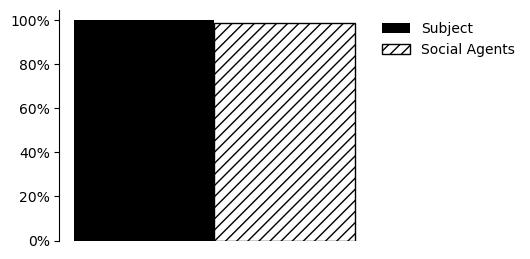

In [59]:
x = ['Rank']
x_axis = np.arange(len(x))

plt.rcParams["figure.figsize"] = (4,3) # Size of the plotax.spines['top'].set_visible(False)
for pos in ['right', 'top', 'bottom']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)
    
plt.xticks([]) # Removes x-ticks

plt.bar(x_axis - 0.2, subject_data, 0.4, label = 'Subject', color = 'black')
plt.bar(x_axis + 0.2, agent_data, 0.4, label = 'Social Agents', fill=False, hatch='///')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0)) #Makes y percentages

plt.legend(bbox_to_anchor=(1.0, 1.0),frameon = False) #Moves legend and takes frame off

# Pie Graph of familiarity

In [60]:
#Seperating by comma
column_name = 'Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) '
famtime_df = pd.read_csv(filename,usecols = [column_name])

fixed_column_name = column_name + "_fixed"
copy_famtime_df = famtime_df.copy()
copy_famtime_df[fixed_column_name] = copy_famtime_df[column_name].apply(lambda x: x.split(","))
exploded_famtime_df = copy_famtime_df.explode(fixed_column_name).reset_index()

#exploded_famtime_df = exploded_famtime_df[exploded_famtime_df[fixed_column_name].str.contains('minutes')==True]
#exploded_famtime_df = exploded_famtime_df.drop(column_name,axis = 1)

#exploded_dfam_s = exploded_dfam_df[fixed_column_name].str.replace(r'\D','').astype(int)

In [61]:
exploded_famtime_df

,index,"Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent)","Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) _fixed"
0,0,5 min exposure or less,5 min exposure or less
1,1,5 min exposure or less,5 min exposure or less
2,2,5 min exposure or less,5 min exposure or less
3,3,5 min exposure or less,5 min exposure or less
4,4,5 min exposure or less,5 min exposure or less
...,...,...,...
733,668,10 minutes,10 minutes
734,669,5 min exposure or less,5 min exposure or less
735,670,5 min exposure or less,5 min exposure or less
736,671,"5 min exposure or less, 10 minutes",5 min exposure or less


In [62]:
sliced_column = "sliced column"
exploded_famtime_df[sliced_column] = 'ethologically relevant relationships'

for i in range(len(exploded_famtime_df[sliced_column])):
    if '5 min exposure' in exploded_famtime_df[fixed_column_name][i]:
        exploded_famtime_df.loc[i, sliced_column] = '< 5 min' 
    elif 'minutes' in exploded_famtime_df[fixed_column_name][i]:
        exploded_famtime_df.loc[i, sliced_column] = '5min - 2hrs'
    elif 'day' in exploded_famtime_df[fixed_column_name][i]:
        exploded_famtime_df.loc[i, sliced_column] = '1 - 7 days'
    elif 'specify' in exploded_famtime_df[fixed_column_name][i]:
        exploded_famtime_df.loc[i, sliced_column] = 'Does not specify'
    #If string contains minutes
    #IF string contains day

In [63]:
exploded_famtime_df[sliced_column].unique()

array(['< 5 min', '5min - 2hrs', 'ethologically relevant relationships',
       'Does not specify', '1 - 7 days'], dtype=object)

In [64]:
exploded_famtime_df.loc[exploded_famtime_df[sliced_column] == 'ethologically relevant relationships']

,index,"Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent)","Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) _fixed",sliced column
30,29,"cagemate, 15 minutes, 20 minutes",cagemate,ethologically relevant relationships
91,79,"5 min exposure or less, 15 minutes, littermate",littermate,ethologically relevant relationships
94,81,"5 min exposure or less, littermate (not co-hou...",littermate (not co-housed),ethologically relevant relationships
104,91,offspring,offspring,ethologically relevant relationships
217,197,"10 minutes, littermate",littermate,ethologically relevant relationships
238,217,"parent (mother), 10 minutes",parent (mother),ethologically relevant relationships
301,276,"littermate, 5 min exposure or less",littermate,ethologically relevant relationships
416,383,offspring,offspring,ethologically relevant relationships
429,394,"5 min exposure or less, littermate",littermate,ethologically relevant relationships
443,405,"10 minutes, 12 minutes, littermate",littermate,ethologically relevant relationships


In [65]:
total_famtime_df = exploded_famtime_df.groupby([sliced_column]).count().loc[:,'index']
total_famtime_df

sliced column
1 - 7 days                                8
5min - 2hrs                             254
< 5 min                                 442
Does not specify                         10
ethologically relevant relationships     24
Name: index, dtype: int64

Text(0, 0.5, 'Exposure')

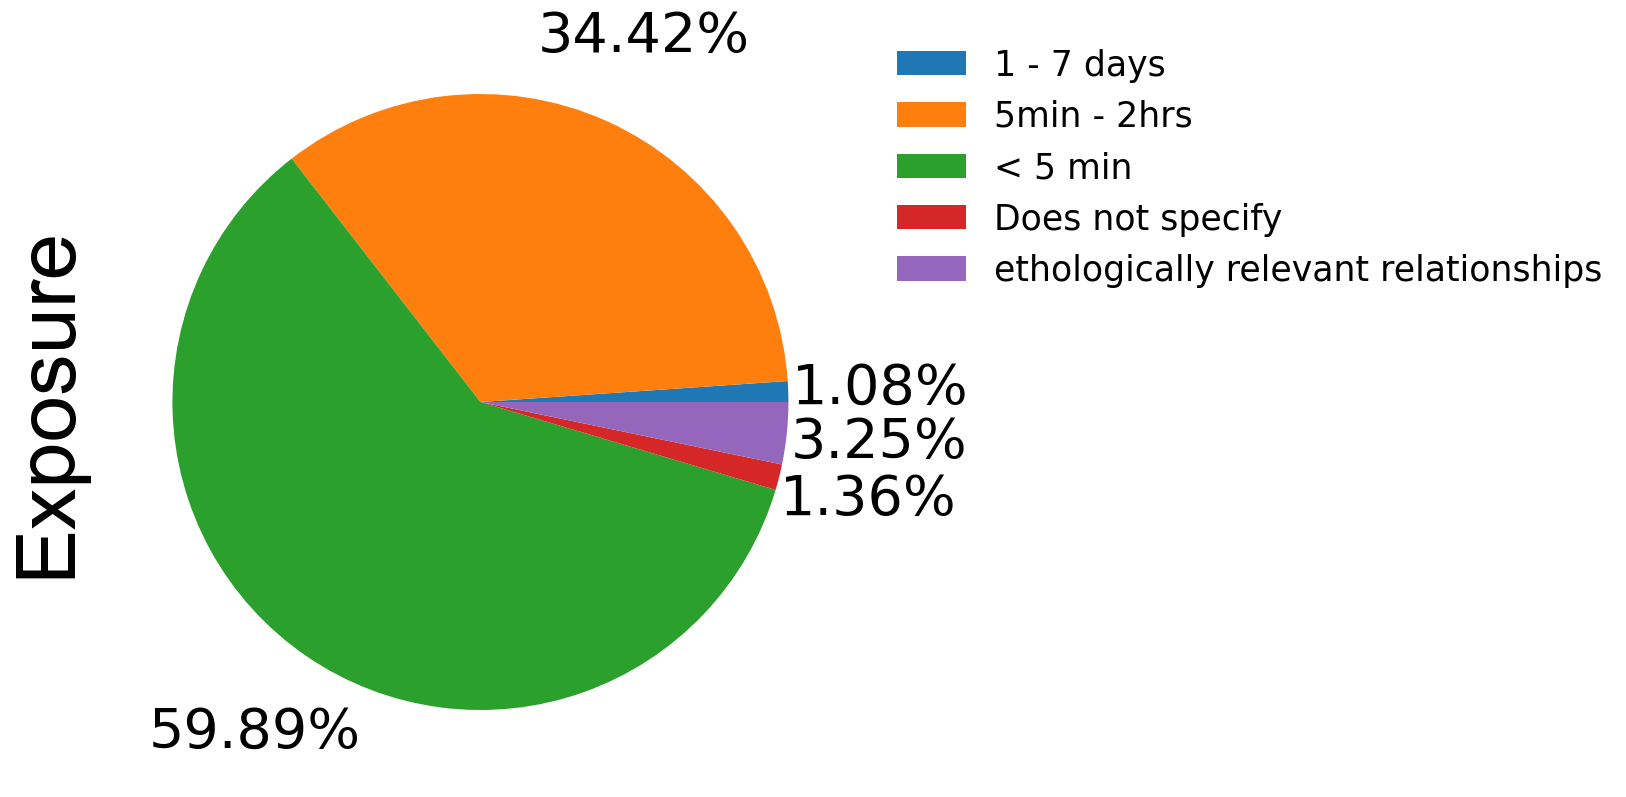

In [66]:
plt.rcParams["figure.figsize"] = (18,10)
total_famtime_df.plot(kind='pie',subplots = True,autopct='%.2f%%', pctdistance=1.3, labeldistance=None, fontsize = AXESLABEL)#cmap=my_colors,
plt.legend(bbox_to_anchor=(1.0, 1.0),frameon = False, fontsize = LEGSIZE) #Moves legend and takes frame off
plt.ylabel("Exposure", fontsize = TITLESIZE, family = 'Arial')
#plt.savefig("./proc/plots/FAMTIME.svg")

## Ethicologically Relevant Bar Graph

In [76]:
er_df = exploded_famtime_df.loc[exploded_famtime_df[sliced_column] == 'ethologically relevant relationships']
er_df = er_df[fixed_column_name].str.strip()

In [77]:
rank_serie = pd.Series(['ranked']= 1)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1044364186.py, line 1)

In [78]:
e_df_simply = er_df.copy()
e_df_simply.loc[:] = er_df.loc[:].replace({'littermate (not co-housed)': "littermate", 'parent (mother)': 'parent \n(mother)'})
total_rel = e_df_simply.value_counts()
#type(total_rel)
#total_rel = pd.concat([total_rel, rank_serie])


In [80]:
total_rel['ranked'] = 1

In [81]:
total_rel

littermate           13
cagemate              4
parent \n(mother)     3
offspring             2
mate                  2
ranked                1
Name: Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) _fixed, dtype: int64

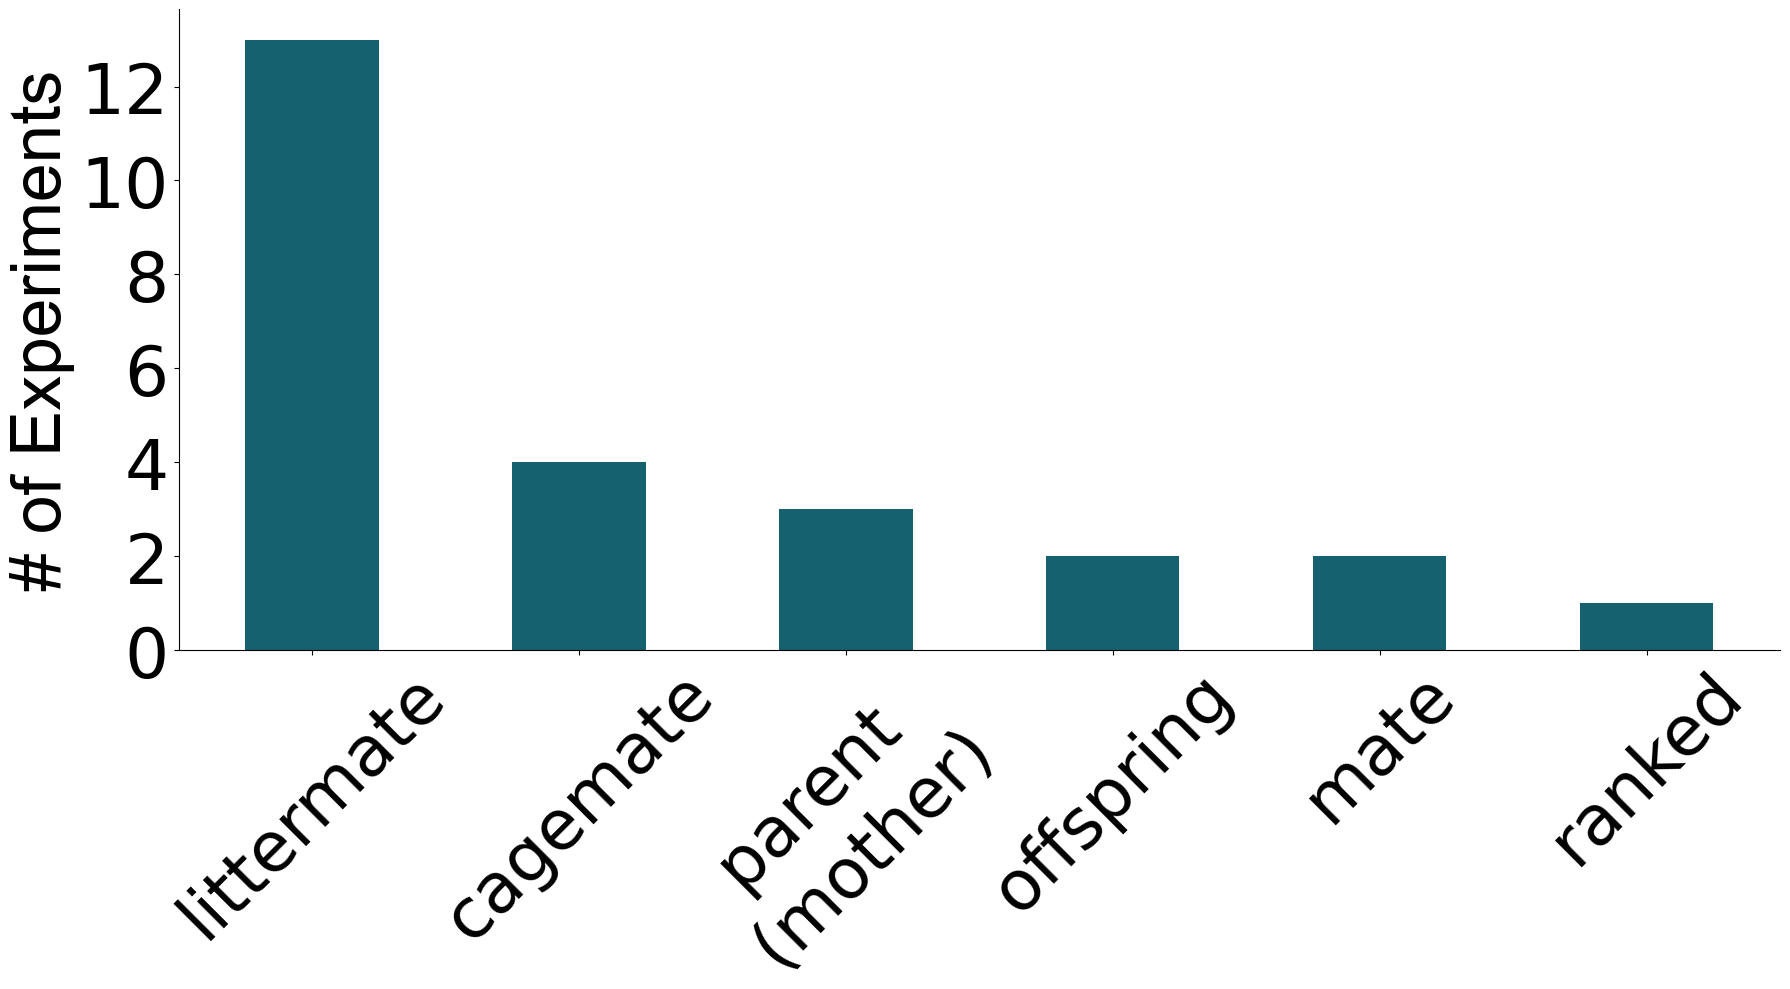

In [83]:
#fixed_column_name = 2nd column
total_rel.plot.bar(color = pclabcol[0])
plt.xticks(fontsize = 50, rotation = 45)
plt.yticks(fontsize = 50)
for pos in ['right', 'top']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)
plt.ylabel('# of Experiments', family = 'Arial', fontsize = 50)
#plt.suptitle('Littermate most tested among \nethologically-relevant relationships', family = 'Arial', fontsize = TITLESIZE, x = 0.5)
plt.tight_layout()
plt.savefig('./proc/plots/ethorel_paper.svg')
#plt.savefig('./proc/plots/ethorel.svg')



# Social Memory/Recognition Papers of the Years

In [46]:
#m_df = survey_df[['Title','Publication Date (YYYY-MM)']].copy()

# Pie Graph social agent idntities

insert graph showing percent of social agent identities: juvenile males, juvenile females, juveniles sex not specified, adult males, adult female OVX, intact adult females, adults sex not specified* 

juvenile male, juvenile female, juvenile unspecified, adult male, adult intact female, ovariectomized female, adult unspecified, unspecified female, unspecified male, does not specify

In [47]:
survey_df = pd.read_csv(filename, keep_default_na=False)

In [48]:
#survey_df = pd.read_csv(r"C:\Users\yongc\Documents\GitHub\literature_review_processing\results\2022_09_09_literature_review_processing\data\Copy of Literature Review (Responses) - Copy of Form Responses 1.csv", keep_default_na=False)
column_name = 'Social Agent Identity'
fixed_column_name = column_name + "_fixed"
copy_of_survey_df = survey_df.copy()
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(","))

exploded_survey_df = copy_of_survey_df.explode(fixed_column_name).reset_index()

In [49]:
exploded_survey_df[fixed_column_name] = exploded_survey_df[fixed_column_name].str.strip()

In [50]:
exploded_survey_df[fixed_column_name].unique()

array(['not specified intact female', 'juvenile male', 'juvenile female',
       'juvenile not specified', 'ovariectomized female', 'adult male',
       'does not specify', 'adult intact female', 'not specified male',
       'adule intact female', 'juvenile unspecified juvenile',
       'infant not specified', 'jvenile unspecified', 'infant male',
       'not specified', 'adult not specified', 'male juvenile', '',
       'unspecified female', 'juvenile male. juvenile female',
       'female juvenile', 'ovariectomized juvenile female',
       'young adult female', 'young adult male'], dtype=object)

In [51]:
#Typos
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['adule intact female'],'adult intact female')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['female juvenile'],'juvenile female')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['not specified'],'does not specify')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['juvenile not specified'],'juvenile not specified')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['juvenile unspecified juvenile'],'juvenile not specified')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['jvenile unspecified'],'juvenile not specified')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['juvenile male. juvenile female'],'juvenile male') # Added another juvenile female
exploded_survey_df[fixed_column_name].loc[len(exploded_survey_df[fixed_column_name].index)] = ['juvenile female']

In [52]:
#Making it easier to look at 
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['juvenile male'],'juvenile male')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['juvenile female'],'juvenile female')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['juvenile not specified'],'juvenile not specified')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['male juvenile'],'juvenile male')

exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['infant male'],'infant')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['infant not specified'],'infant')

exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['ovariectomized juvenile female'],'ovariectomized female')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['overiectomized juvenile female'],'ovariectomized female')

exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace([''],'infant')

#exploded_survey_df[fixed_column_name].loc[len(exploded_survey_df[fixed_column_name].index)] = ['juvenile'] # For tthe ojFemale

#plot breakdown of age first: adults vs juveniles vs not specified vs infants 
#subject identity 



In [53]:
exploded_survey_df.groupby([fixed_column_name]).sum()
#exploded_survey_df.groupby([fixed_column_name]).sum().sum()
#268897
#35.67% juvenile male

,index
Social Agent Identity_fixed,
adult intact female,23324
adult male,43495
adult not specified,2596
does not specify,10892
infant,2905
juvenile female,21206
juvenile male,102502
juvenile not specified,20512
not specified intact female,6964


Text(0, 0.5, 'Social Agent Identity')

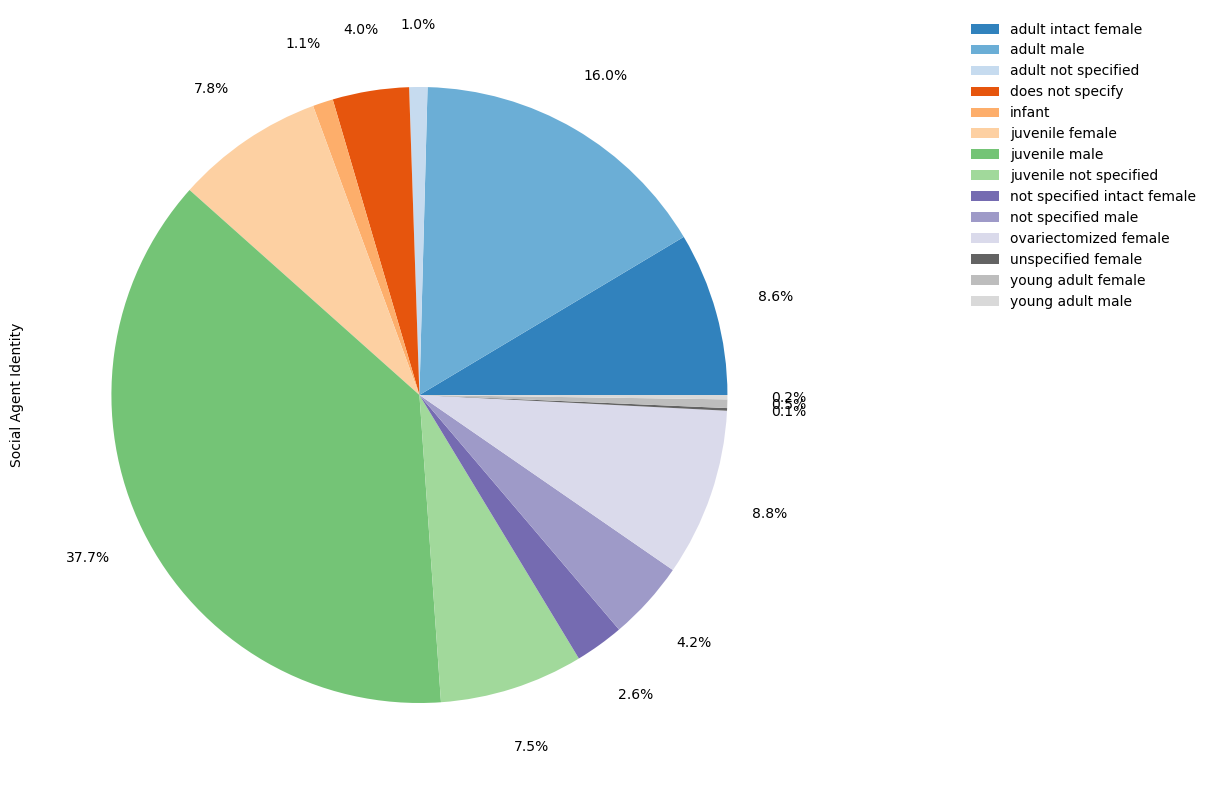

In [54]:
from matplotlib import cm
exploded_survey_df.groupby([fixed_column_name]).sum().plot(kind='pie',subplots = True, labeldistance=None,cmap='tab20c',autopct='%.1f%%',pctdistance=1.2)
plt.legend(bbox_to_anchor=(1.2, 1.0),frameon = False) #Moves legend and takes frame off
plt.ylabel("Social Agent Identity")
#plt.savefig("./proc/SAIdentity.svg")

In [55]:
#import random
#plt.rcParams["figure.figsize"] = [7.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
#n = 20
#slices = np.arange(n)
#activities = np.arange(n)
#colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#for i in range(n)]

#patches, texts = plt.pie(slices,
#   colors=colors,
#   startangle=90,
#   labels=slices)

#labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(activities,
#100.*slices/slices.sum())]
#plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
#plt.show()

# Social Agent Sex Pie Graph

In [56]:
sexlst = []

In [57]:
sexlst

[]

In [58]:
sexlst.append(exploded_survey_df[fixed_column_name].str.contains(' male').sum())
sexlst.append(exploded_survey_df[fixed_column_name].str.contains('female').sum())
sexlst.append(exploded_survey_df[fixed_column_name].str.contains('does not specify').sum())
sexlst.append(survey_df['Social Agent Sex'].str.contains('Uses both').sum())

In [59]:
sexlst

[452, 220, 52, 111]

In [60]:
sexlst2 = []

In [61]:
sexlst2.append(survey_df['Social Agent Identity'].str.contains('male').sum())
sexlst2.append(survey_df['Social Agent Identity'].str.contains('female').sum())
sexlst2.append(survey_df['Social Agent Identity'].str.contains('Does not specify').sum())
sexlst2.append(survey_df['Social Agent Identity'].str.contains(' male' and 'female').sum())

In [62]:

contain_male_and_female = survey_df['Social Agent Identity'].str.contains(' male') & survey_df['Social Agent Identity'].str.contains('female')
survey_df['both_male_and_female'] = contain_male_and_female
pd.set_option('display.max_rows', 700)

survey_df.loc[:, ['Social Agent Identity', 'both_male_and_female']]


,Social Agent Identity,both_male_and_female
0,not specified intact female,False
1,juvenile male,False
2,"juvenile male, juvenile female",True
3,juvenile male,False
4,juvenile male,False
5,juvenile male,False
6,juvenile not specified,False
7,ovariectomized female,False
8,juvenile male,False
9,adult male,False


In [63]:
def fix_sex(original_identity):
    if (' male' in original_identity) and ('female' in original_identity):
        return 'uses both'
    if (' male' in original_identity) and ('female' not in original_identity):
        return 'male'
    if (' male' not in original_identity) and ('female' in original_identity):
        return 'female'
    
    return 'not specified'

survey_df['Social Agent Identity_fixed'] = survey_df['Social Agent Identity'].apply(fix_sex )
survey_df.loc[:, ['Social Agent Identity','Social Agent Identity_fixed']]

,Social Agent Identity,Social Agent Identity_fixed
0,not specified intact female,female
1,juvenile male,male
2,"juvenile male, juvenile female",uses both
3,juvenile male,male
4,juvenile male,male
5,juvenile male,male
6,juvenile not specified,not specified
7,ovariectomized female,female
8,juvenile male,male
9,adult male,male


In [64]:
sa_sex_totals = survey_df.groupby(['Social Agent Identity_fixed']).count()
sa_sex_totals = sa_sex_totals[['Title']]
sa_sex_totals

,Title
Social Agent Identity_fixed,
female,105
male,330
not specified,126
uses both,111


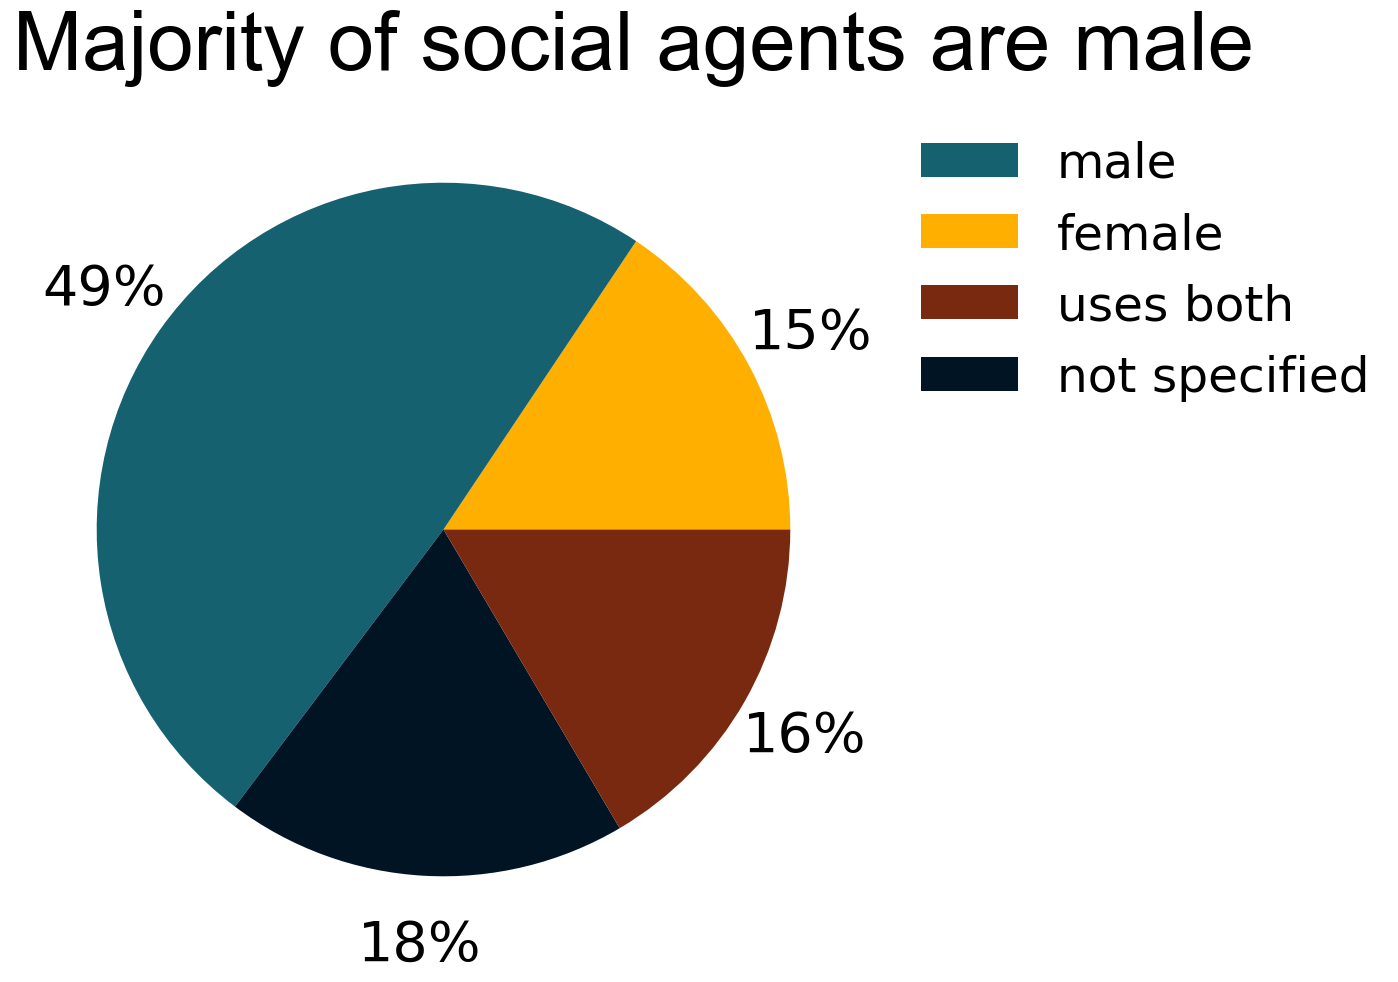

In [65]:
plt.pie(sa_sex_totals['Title'], labels = sa_sex_totals.index, autopct='%d%%', colors = pclabcol4, pctdistance=1.2, labeldistance=None, textprops ={'fontsize': AXESLABEL})
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [1,0,3,2]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.0, 1.0),frameon = False, fontsize = 35) #Moves legend and takes frame off
plt.suptitle("Majority of social agents are male", fontsize = TITLESIZE, family = 'Arial', x =0.55)
plt.tight_layout() 
plt.ylabel("")
plt.savefig('./proc/plots/SAsex.svg')

# Social Agent Age Pie Graph

In [66]:
agelst = []

In [67]:
agelst.append(exploded_survey_df[fixed_column_name].str.contains('infant').sum())
agelst.append(exploded_survey_df[fixed_column_name].str.contains('juvenile').sum())
agelst.append(exploded_survey_df[fixed_column_name].str.contains('adult').sum())
agelst.append(exploded_survey_df[fixed_column_name].str.contains('does not specify').sum())

In [68]:
labeli = ['infant','juvenile','adult','does not specify']

C:\Users\megha\AppData\Local\Temp\ipykernel_31172\2651723493.py:2: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(agelst,labels=labeli,bbox_to_anchor=[1.2,1])


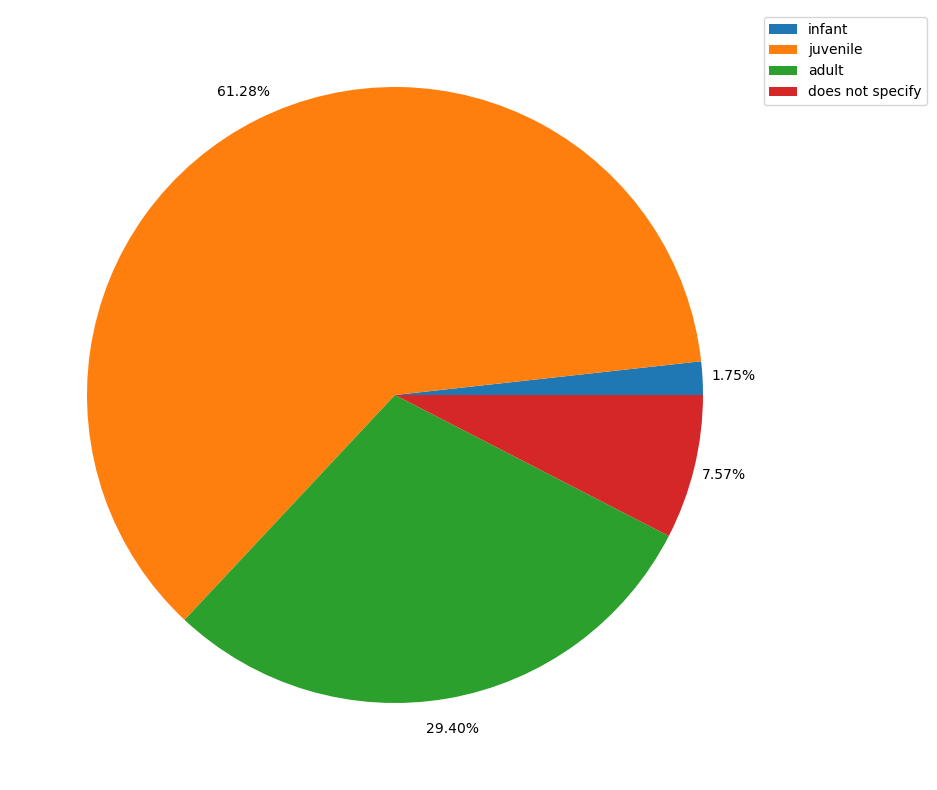

In [69]:
plt.pie(agelst,autopct='%1.2f%%',pctdistance = 1.1)
plt.legend(agelst,labels=labeli,bbox_to_anchor=[1.2,1])

# ITI Colum Pie Graph

In [85]:
iti_df = pd.read_csv(filename)

In [86]:
column_name = 'Intertrial Interval (ITI) (time between trials)'
fixed_column_name = column_name + "_fixed"
copy_of_iti_df = iti_df.copy()
copy_of_iti_df[fixed_column_name] = copy_of_iti_df[column_name].apply(lambda x: x.split(","))
exploded_iti_df = copy_of_iti_df.explode(fixed_column_name).reset_index()

len(copy_of_iti_df)

672

In [87]:
exploded_iti_df[fixed_column_name] = exploded_iti_df[fixed_column_name].str.replace(" ","")
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['over5minutes-lessthananhour'],'6-59 minutes')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['over6-24hr'],'6-24 hours')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['5min-lessthananhour'],'6-59 minutes')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['over6hr-24hr'],'6-24 hours')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['6hr-24hr'],'6-24 hours')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['over5min-lessthananhour'],'6-59 minutes')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['notspecified'],'not specified')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['Doesnotspecify'],'not specified')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['1-6hr'],'1-6 hours')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['1-5minutes'],'1-5 minutes')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['over24hrs'],'over 24 hours')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['noITI'],'no ITI')
exploded_iti_df[fixed_column_name]=exploded_iti_df[fixed_column_name].replace(['over6-24hrs'],'6-24 hours')


In [88]:
iti_totals = exploded_iti_df.groupby([fixed_column_name]).count()
iti_totals = iti_totals[['index']]
iti_totals

,index
Intertrial Interval (ITI) (time between trials)_fixed,
1-5 minutes,70
1-6 hours,167
6-24 hours,109
6-59 minutes,295
no ITI,39
not specified,137
over 24 hours,11


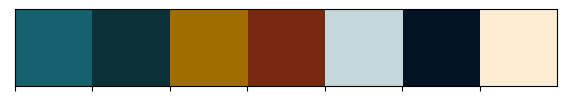

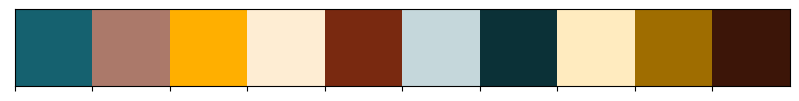

In [89]:
pclabcol_ITI = ['#15616F','#0B3137', '#9F6D00', '#792910','#C5D7DB','#001424', '#FEEDD3']

sns.palplot(sns.color_palette(pclabcol_ITI))
sns.palplot(sns.color_palette(pclabcol3))
col_ITI = ListedColormap(sns.color_palette(pclabcol_ITI))

C:\Users\megha\AppData\Local\Temp\ipykernel_21020\1523807428.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./proc/plots/ITI_paper.svg', bbox_to_anchor = 'tight')


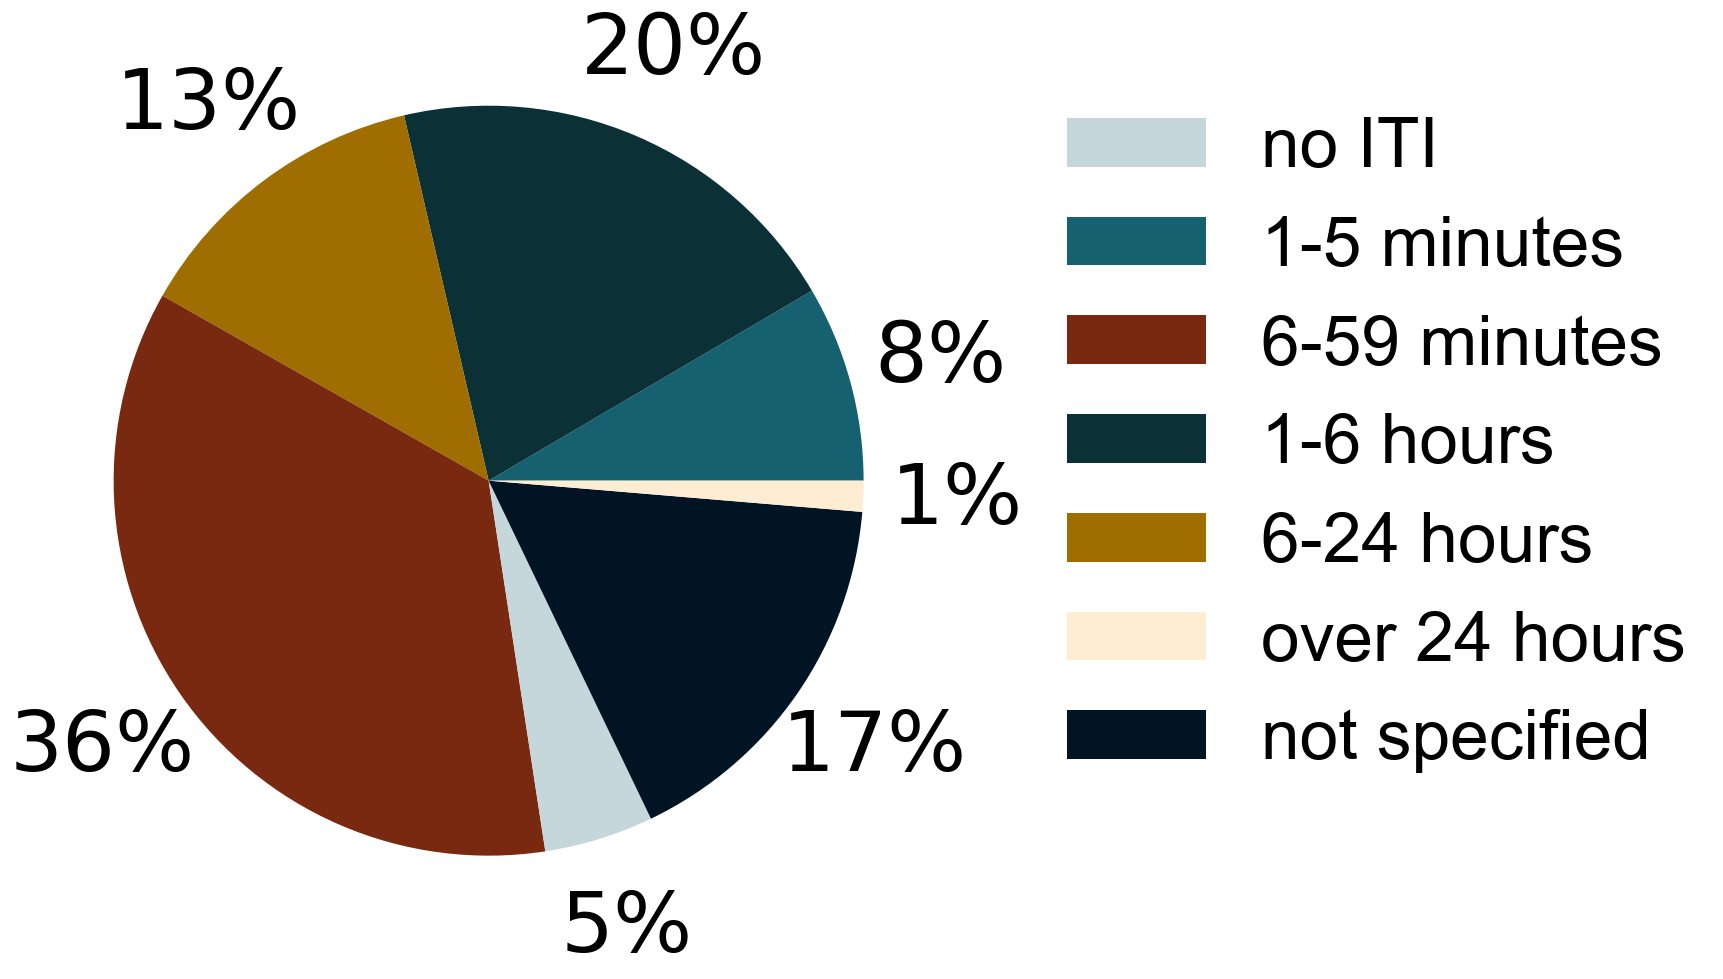

In [90]:
iti_totals.plot(kind='pie',subplots = True, labeldistance=None, cmap = col_ITI, autopct='%1.0f%%',pctdistance=1.25, textprops={'fontsize':60})
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [4,0,3,1,2,6,5]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.05, .955),frameon = False, fontsize = 50, prop = {'family':'Arial', 'size' :50})
#plt.suptitle('Few intertrial intervals \nover 24-hours', fontsize = TITLESIZE, family = 'Arial')
plt.ylabel('')
plt.tight_layout()
#plt.savefig('./proc/plots/ITI.svg')
plt.savefig('./proc/plots/ITI_paper.svg', bbox_to_anchor = 'tight')
